In [173]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from geopy.distance import great_circle


from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

In [174]:
df = pd.read_csv('OneDrive/Operator/nyc_taxi_trip_duration.csv')

In [175]:
print("No. of rows: ", df.shape[0])
print("No. of columns: ", df.shape[1])

No. of rows:  729322
No. of columns:  11


In [176]:
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id1080784          2  2016-02-29 16:40:21  2016-02-29 16:47:01   
1  id0889885          1  2016-03-11 23:35:37  2016-03-11 23:53:57   
2  id0857912          2  2016-02-21 17:59:33  2016-02-21 18:26:48   
3  id3744273          2  2016-01-05 09:44:31  2016-01-05 10:03:32   
4  id0232939          1  2016-02-17 06:42:23  2016-02-17 06:56:31   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.953918        40.778873         -73.963875   
1                2        -73.988312        40.731743         -73.994751   
2                2        -73.997314        40.721458         -73.948029   
3                6        -73.961670        40.759720         -73.956779   
4                1        -74.017120        40.708469         -73.988182   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.771164                  N            400  
1         40.694931                  N           1100  
2         40.774918                  N           1635  
3         40.780628                  N           1141  
4         40.740631                  N            848

In [177]:
df.tail()

id  vendor_id      pickup_datetime     dropoff_datetime  \
729317  id3905982          2  2016-05-21 13:29:38  2016-05-21 13:34:34   
729318  id0102861          1  2016-02-22 00:43:11  2016-02-22 00:48:26   
729319  id0439699          1  2016-04-15 18:56:48  2016-04-15 19:08:01   
729320  id2078912          1  2016-06-19 09:50:47  2016-06-19 09:58:14   
729321  id1053441          2  2016-01-01 17:24:16  2016-01-01 17:44:40   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
729317                2        -73.965919        40.789780         -73.952637   
729318                1        -73.996666        40.737434         -74.001320   
729319                1        -73.997849        40.761696         -74.001488   
729320                1        -74.006706        40.708244         -74.013550   
729321                4        -74.003342        40.743839         -73.945847   

        dropoff_latitude store_and_fwd_flag  trip_duration  
729317         40.789181                  N            296  
729318         40.731911                  N            315  
729319         40.741207                  N            673  
729320         40.713814                  N            447  
729321         40.712841                  N           1224

In [178]:
print("No. of missing values in each columns: \n")
print(df.isnull().sum())

No. of missing values in each columns: 

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [179]:
print("No. of duplicate records: ", df.duplicated().sum())

No. of duplicate records:  0


In [180]:
df.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

In [181]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [182]:
df['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

In [183]:
label_encoder = LabelEncoder()


df['store_and_fwd_flag_encoded']= label_encoder.fit_transform(df['store_and_fwd_flag'])
df['store_and_fwd_flag_encoded']= label_encoder.fit_transform(df['store_and_fwd_flag'])

In [184]:
print(df[['pickup_datetime', 'dropoff_datetime']].dtypes)

pickup_datetime     object
dropoff_datetime    object
dtype: object


In [185]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

In [186]:
print(df[['pickup_datetime', 'dropoff_datetime']].dtypes)

pickup_datetime     datetime64[ns]
dropoff_datetime    datetime64[ns]
dtype: object


In [187]:
print("Startdate: ", df['pickup_datetime'].min())
print("Enddate: ", df['pickup_datetime'].max())

Startdate:  2016-01-01 00:01:14
Enddate:  2016-06-30 23:59:37


In [188]:
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday


plt.figure(figsize=(20, 5))


plt.subplot(141)
sns.countplot(df['pickup_day'])
plt.xlabel('Day')
plt.ylabel('Total Number of pickups')


plt.subplot(142)
sns.countplot(df['pickup_hour'])
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')


plt.subplot(143)
sns.countplot(df['pickup_weekday'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')

Text(0, 0.5, 'Total Number of pickups')

In [189]:
df['dropoff_day'] = df['dropoff_datetime'].dt.day
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_weekday'] = df['dropoff_datetime'].dt.weekday

In [190]:
df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id1080784          2 2016-02-29 16:40:21 2016-02-29 16:47:01   
1  id0889885          1 2016-03-11 23:35:37 2016-03-11 23:53:57   
2  id0857912          2 2016-02-21 17:59:33 2016-02-21 18:26:48   
3  id3744273          2 2016-01-05 09:44:31 2016-01-05 10:03:32   
4  id0232939          1 2016-02-17 06:42:23 2016-02-17 06:56:31   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.953918        40.778873         -73.963875   
1                2        -73.988312        40.731743         -73.994751   
2                2        -73.997314        40.721458         -73.948029   
3                6        -73.961670        40.759720         -73.956779   
4                1        -74.017120        40.708469         -73.988182   

   dropoff_latitude store_and_fwd_flag  trip_duration  \
0         40.771164                  N            400   
1         40.694931                  N           1100   
2         40.774918                  N           1635   
3         40.780628                  N           1141   
4         40.740631                  N            848   

   store_and_fwd_flag_encoded  pickup_day  pickup_hour  pickup_weekday  \
0                           0          29           16               0   
1                           0          11           23               4   
2                           0          21           17               6   
3                           0           5            9               1   
4                           0          17            6               2   

   dropoff_day  dropoff_hour  dropoff_weekday  
0           29            16                0  
1           11            23                4  
2           21            18                6  
3            5            10                1  
4           17             6                2

In [191]:
def calculate_distance(pickup_lat, pickup_long, dropoff_lat, dropoff_long):
 
 start_coords = (pickup_lat, pickup_long)
 stop_coords = (dropoff_lat, dropoff_long)
 
 return great_circle(start_coords,stop_coords).km

In [192]:
df['distance'] = df.apply(lambda x: calculate_distance(x['pickup_latitude'], 
                                                       x['pickup_longitude'],
                                                       x['dropoff_latitude'],
                                                       x['dropoff_longitude']), axis=1)

In [193]:
df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id1080784          2 2016-02-29 16:40:21 2016-02-29 16:47:01   
1  id0889885          1 2016-03-11 23:35:37 2016-03-11 23:53:57   
2  id0857912          2 2016-02-21 17:59:33 2016-02-21 18:26:48   
3  id3744273          2 2016-01-05 09:44:31 2016-01-05 10:03:32   
4  id0232939          1 2016-02-17 06:42:23 2016-02-17 06:56:31   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.953918        40.778873         -73.963875   
1                2        -73.988312        40.731743         -73.994751   
2                2        -73.997314        40.721458         -73.948029   
3                6        -73.961670        40.759720         -73.956779   
4                1        -74.017120        40.708469         -73.988182   

   dropoff_latitude store_and_fwd_flag  trip_duration  \
0         40.771164                  N            400   
1         40.694931                  N           1100   
2         40.774918                  N           1635   
3         40.780628                  N           1141   
4         40.740631                  N            848   

   store_and_fwd_flag_encoded  pickup_day  pickup_hour  pickup_weekday  \
0                           0          29           16               0   
1                           0          11           23               4   
2                           0          21           17               6   
3                           0           5            9               1   
4                           0          17            6               2   

   dropoff_day  dropoff_hour  dropoff_weekday  distance  
0           29            16                0  1.199074  
1           11            23                4  4.129117  
2           21            18                6  7.250763  
3            5            10                1  2.361101  
4           17             6                2  4.328540

In [194]:
df['distance'].value_counts()

0.000000    2901
0.000424      20
0.000424      19
0.000424      16
0.000424      11
            ... 
2.929161       1
0.977650       1
0.925223       1
4.112012       1
5.945846       1
Name: distance, Length: 726243, dtype: int64

Text(0, 0.5, 'Frequency')

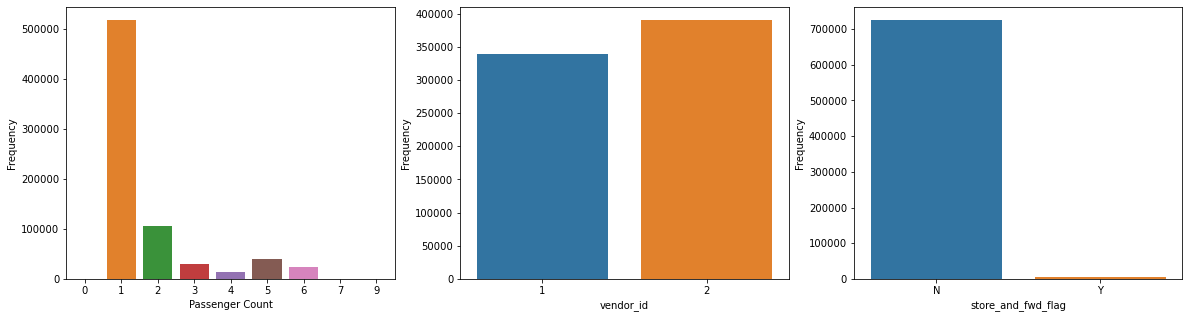

In [195]:
plt.figure(figsize=(20, 5))


plt.subplot(131)
sns.countplot(df['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')


plt.subplot(132)
sns.countplot(df['vendor_id'])
plt.xlabel('vendor_id')
plt.ylabel('Frequency')


plt.subplot(133)
sns.countplot(df['store_and_fwd_flag'])
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Frequency')

In [196]:
df['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

In [197]:
df=df[df['passenger_count']!=0]
df=df[df['passenger_count']<=6]

In [198]:
df['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

In [199]:
df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id1080784          2 2016-02-29 16:40:21 2016-02-29 16:47:01   
1  id0889885          1 2016-03-11 23:35:37 2016-03-11 23:53:57   
2  id0857912          2 2016-02-21 17:59:33 2016-02-21 18:26:48   
3  id3744273          2 2016-01-05 09:44:31 2016-01-05 10:03:32   
4  id0232939          1 2016-02-17 06:42:23 2016-02-17 06:56:31   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.953918        40.778873         -73.963875   
1                2        -73.988312        40.731743         -73.994751   
2                2        -73.997314        40.721458         -73.948029   
3                6        -73.961670        40.759720         -73.956779   
4                1        -74.017120        40.708469         -73.988182   

   dropoff_latitude store_and_fwd_flag  trip_duration  \
0         40.771164                  N            400   
1         40.694931                  N           1100   
2         40.774918                  N           1635   
3         40.780628                  N           1141   
4         40.740631                  N            848   

   store_and_fwd_flag_encoded  pickup_day  pickup_hour  pickup_weekday  \
0                           0          29           16               0   
1                           0          11           23               4   
2                           0          21           17               6   
3                           0           5            9               1   
4                           0          17            6               2   

   dropoff_day  dropoff_hour  dropoff_weekday  distance  
0           29            16                0  1.199074  
1           11            23                4  4.129117  
2           21            18                6  7.250763  
3            5            10                1  2.361101  
4           17             6                2  4.328540

In [200]:
df['id'].nunique()

729287

In [201]:
df.shape

(729287, 19)

In [202]:
df['trip_duration'].describe()/3600

count    202.579722
mean       0.264515
std        1.073531
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

In [203]:
df['trip_duration_in_hour'] = df['trip_duration'].apply(lambda x : x/3600)

In [204]:
df = df[df['trip_duration_in_hour']<=24]

In [205]:
df['trip_duration_in_hour'].min(), df['trip_duration_in_hour'].max()

(0.0002777777777777778, 23.9975)

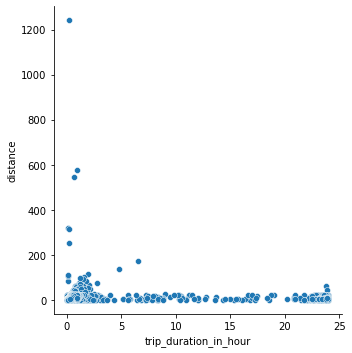

In [206]:
sns.relplot(y=df['distance'],x='trip_duration_in_hour',data=df)

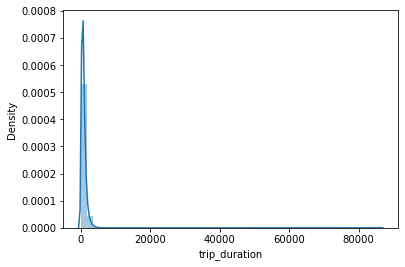

In [207]:
sns.distplot(df['trip_duration'])
plt.show()

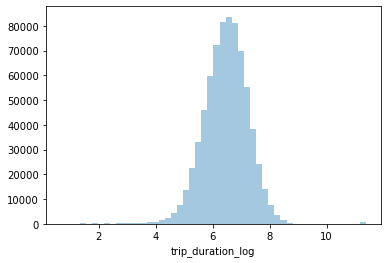

In [208]:
df['trip_duration_log'] = np.log(df['trip_duration'].values + 1)
sns.distplot(df['trip_duration_log'], kde = False)
plt.show()

In [209]:
df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id1080784          2 2016-02-29 16:40:21 2016-02-29 16:47:01   
1  id0889885          1 2016-03-11 23:35:37 2016-03-11 23:53:57   
2  id0857912          2 2016-02-21 17:59:33 2016-02-21 18:26:48   
3  id3744273          2 2016-01-05 09:44:31 2016-01-05 10:03:32   
4  id0232939          1 2016-02-17 06:42:23 2016-02-17 06:56:31   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.953918        40.778873         -73.963875   
1                2        -73.988312        40.731743         -73.994751   
2                2        -73.997314        40.721458         -73.948029   
3                6        -73.961670        40.759720         -73.956779   
4                1        -74.017120        40.708469         -73.988182   

   dropoff_latitude store_and_fwd_flag  ...  store_and_fwd_flag_encoded  \
0         40.771164                  N  ...                           0   
1         40.694931                  N  ...                           0   
2         40.774918                  N  ...                           0   
3         40.780628                  N  ...                           0   
4         40.740631                  N  ...                           0   

   pickup_day  pickup_hour  pickup_weekday  dropoff_day  dropoff_hour  \
0          29           16               0           29            16   
1          11           23               4           11            23   
2          21           17               6           21            18   
3           5            9               1            5            10   
4          17            6               2           17             6   

   dropoff_weekday  distance  trip_duration_in_hour  trip_duration_log  
0                0  1.199074               0.111111           5.993961  
1                4  4.129117               0.305556           7.003974  
2                6  7.250763               0.454167           7.400010  
3                1  2.361101               0.316944           7.040536  
4                2  4.328540               0.235556           6.744059  

[5 rows x 21 columns]

In [210]:
df1 = df.drop(columns=['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude',	'pickup_latitude',	
                       'dropoff_longitude',	'dropoff_latitude',	'store_and_fwd_flag',	'trip_duration', 
                       'trip_duration_in_hour'])

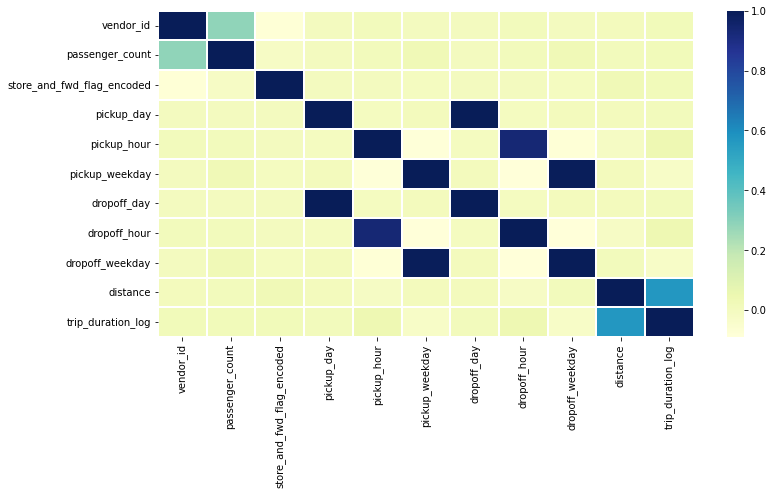

In [211]:
plt.figure(figsize=(12, 6))
corr = df1.corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

In [212]:
df1.head(2)

vendor_id  passenger_count  store_and_fwd_flag_encoded  pickup_day  \
0          2                1                           0          29   
1          1                2                           0          11   

   pickup_hour  pickup_weekday  dropoff_day  dropoff_hour  dropoff_weekday  \
0           16               0           29            16                0   
1           23               4           11            23                4   

   distance  trip_duration_log  
0  1.199074           5.993961  
1  4.129117           7.003974

In [213]:
X = df1.drop('trip_duration_log', axis=1)
y = df1['trip_duration_log']

In [214]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

X = pd.DataFrame(x_scaled, columns=X.columns)

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [216]:
benchmark_train = pd.concat([X_train, y_train], axis=1, join="inner")
benchmark_test = pd.concat([X_test, y_test], axis=1, join="inner")

In [217]:
benchmark_train.head(3)

vendor_id  passenger_count  store_and_fwd_flag_encoded  pickup_day  \
377868        0.0              0.0                         0.0    0.333333   
71049         1.0              0.2                         0.0    0.133333   
189296        1.0              0.0                         0.0    0.633333   

        pickup_hour  pickup_weekday  dropoff_day  dropoff_hour  \
377868     0.260870        0.000000     0.333333      0.260870   
71049      0.391304        0.833333     0.133333      0.391304   
189296     0.434783        0.333333     0.633333      0.434783   

        dropoff_weekday  distance  trip_duration_log  
377868         0.000000  0.000696           5.697093  
71049          0.833333  0.001610           6.786717  
189296         0.333333  0.003725           7.856707

In [218]:
benchmark_test.head(3)

vendor_id  passenger_count  store_and_fwd_flag_encoded  pickup_day  \
76711         0.0              0.0                         0.0    0.566667   
293155        0.0              0.2                         0.0    0.533333   
223830        1.0              0.0                         0.0    0.366667   

        pickup_hour  pickup_weekday  dropoff_day  dropoff_hour  \
76711      0.869565        0.000000     0.566667      0.869565   
293155     0.739130        1.000000     0.533333      0.739130   
223830     1.000000        0.666667     0.366667      1.000000   

        dropoff_weekday  distance  trip_duration_log  
76711          0.000000  0.003029           8.104401  
293155         1.000000  0.001234           6.774224  
223830         0.666667  0.001090           5.068904

In [219]:
benchmark_test['simple_mean'] = benchmark_train['trip_duration_log'].mean()

In [220]:
error = sqrt(mean_squared_error(benchmark_test['trip_duration_log'], benchmark_test['simple_mean']))

print("r-squared score of simple mean model: ", error)

r-squared score of simple mean model:  0.7978477147493098


In [221]:
knnr = KNeighborsRegressor(n_neighbors=5)
knnr.fit(X_train, y_train)

KNeighborsRegressor()

In [222]:
y_pred = knnr.predict(X_test)

error = sqrt(mean_squared_error(y_test, y_pred))

print("RMSE of knn model: ", error)

RMSE of knn model:  0.5661117711238467


In [223]:
def elbow(k):
  test = []

  for i in k:
    reg = KNeighborsRegressor(n_neighbors=i)
    reg.fit(X_train, y_train)

    tmp_pred = reg.predict(X_test)
    temp_error = sqrt(mean_squared_error(tmp_pred, y_test))
    test.append(temp_error)

  return test

In [224]:
k = range(1, 10)

In [225]:
test = elbow(k)

Text(0.5, 1.0, 'Elbow curve for test')

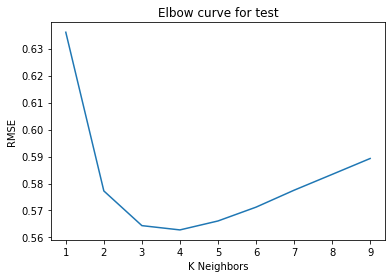

In [226]:
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('RMSE')
plt.title('Elbow curve for test')

In [242]:
knnr = KNeighborsRegressor(n_neighbors=4)
knnr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [228]:
y_pred = knnr.predict(X_test)

knn_test_rmse = sqrt(mean_squared_error(y_test, y_pred))

print("RMSE of knn model: ", knn_test_rmse)

RMSE of knn model:  0.5627958234005154


In [229]:
y_pred = knnr.predict(X_train)

knn_train_rmse = sqrt(mean_squared_error(y_train, y_pred))

print("RMSE of knn model: ", knn_train_rmse)

RMSE of knn model:  0.42257138337091266


In [230]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [231]:
y_pred = lr.predict(X_test)

lm_test_rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE of linear regressor model: ", lm_test_rmse)

RMSE of linear regressor model:  0.6340940147050879


In [232]:
y_pred = lr.predict(X_train)

lm_train_rmse = sqrt(mean_squared_error(y_train, y_pred))

print("RMSE of linear regressor model: ", lm_train_rmse)

RMSE of linear regressor model:  0.6594541143088033


In [233]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [234]:
y_pred = dtr.predict(X_test)

dtr_test_rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE of decision tree regressor model: ", dtr_test_rmse)

RMSE of decision tree regressor model:  0.6232804836375684


In [235]:
y_pred = dtr.predict(X_train)

dtr_train_rmse = sqrt(mean_squared_error(y_train, y_pred))

print("RMSE of decision tree regressor model: ", dtr_train_rmse)

RMSE of decision tree regressor model:  0.029518761665969118


In [236]:
plt.figure(figsize=[10, 5])

train_scores = [0.422, 0.659, 0.029]
test_scores = [0.562, 0.634, 0.623]


X = np.arange(len(train_scores))



plt.bar(X, train_scores, color = 'r', width = 0.25)
plt.bar(X + 0.25, test_scores, color = 'b', width = 0.25)


plt.legend(['Train Score', 'Test Score'])

labels = ['KNN Model', 'Linear Model', 'Decision Tree Model']


plt.xticks([i + 0.25 for i in range(3)], labels)


plt.title("Bar plot representing the train score and test RMSE score of each model")

plt.xlabel('RMSE score')
plt.ylabel('Models')



plt.show()